\section{Mètode d'Euler}
\subsection{Algorisme Mètode d'Euler}

PVI  $y' = f(x,y)$, $y(x_0) = y_0$

Donat un pas $h \neq 0$

Fem 
    

$\eta_0 = y_0$

$\forall i = 0,1,2,3,...$


\begin{itemize}
\item $\eta_{i+1} = \eta_i + h \, f(x_i, \eta_i)$
\item $x_{i+1} = x_i +h$
\end{itemize}

\subsection{Mètode d'Euler 1D}

In [ ]:
%Implementació en OCTAVE

function eta = euler1D(x0, y0, h, f, N)
        eta = zeros(1,N+1);
        eta(1) = y0;
        for i = 1:N
             eta(i+1) = eta(i) + h*f(x0+(i-1)*h, eta(i));
        end
end       
           


\textbf{Exemple}\


PVI 
$
\begin{cases}
y' = 3y\\
y(0) = 1
\end{cases}
$

Sabem que la solució exacta és $y(x) = e^{3x}$\

Com a $f$ tenim el camp vectorial $f(x,y) = 3y$

In [ ]:
%Implementació de la funció f en Octave

function v = f(x,y)
        v = 3*y;
end

Anem a comprovar amb aquest exemple que l'error absolut de 
les solucions aproximades respecte de l'exacta es redueix 
a la meitat en duplicar  N (i.e. en reduir a la meitat el pas $h$)

In [1]:
N =100; 
sol_aprox = euler1D(0,1,1/N, @f, N); %solució aproximada
sol_exact = exp(3*linspace(0,1,N+1));
err1 = abs((sol_aprox - sol_exact)(N+1));

N *=2; 
sol_aprox = euler1D(0,1,1/N, @f, N); %solució aproximada
sol_exact = exp(3*linspace(0,1,N+1));
err2 = abs((sol_aprox - sol_exact)(N+1));


Quocient_derrors = err1/err2 
% l'error en duplicar N  es redueix a la meitat

Quocient_derrors =  1.9591


Podem plotejar la solució exacta conjuntament amb la aproximada

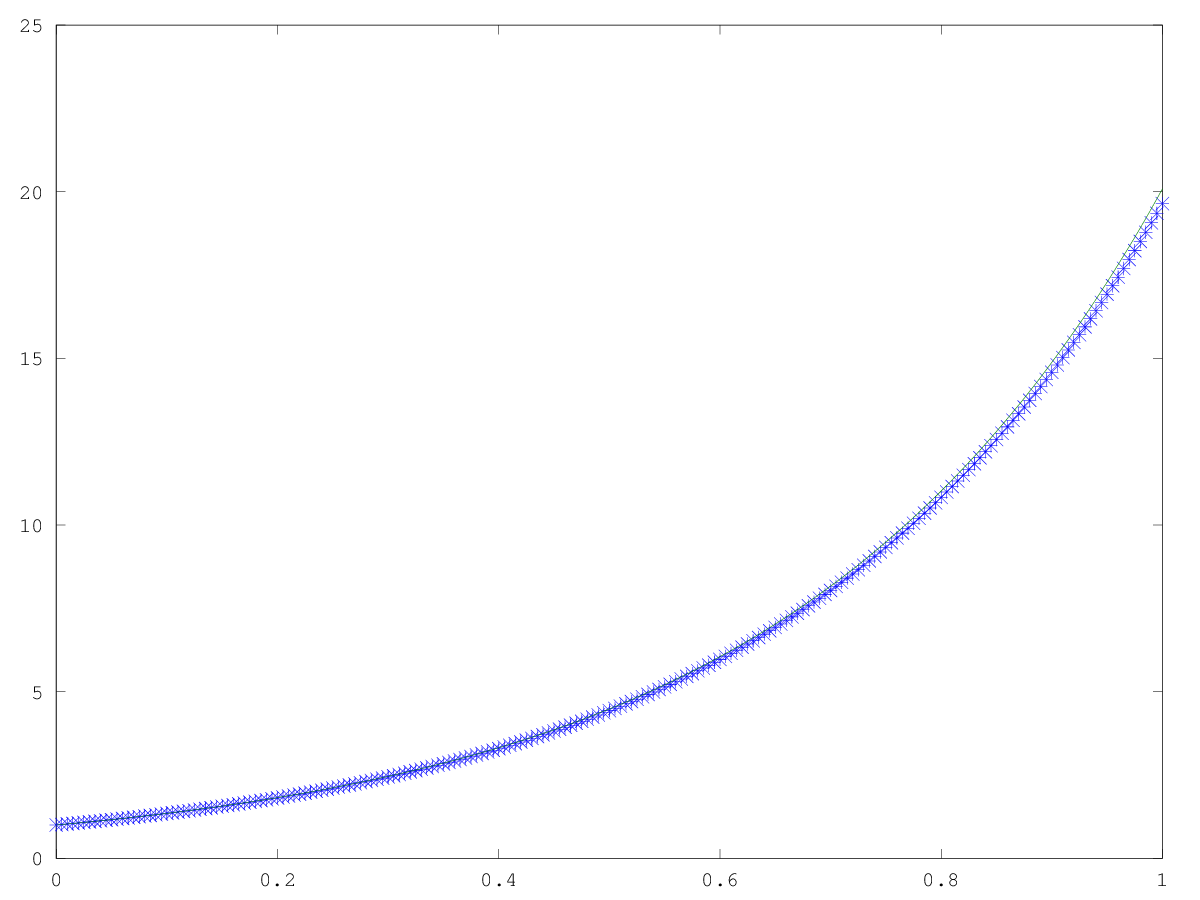

In [2]:
plot(linspace(0,1,N+1), sol_aprox, "*", linspace(0,1,N+1), sol_exact, "-")


\subsection{MÈTODE D'EULER ND}



In [ ]:
%Implementació en Octave / modificació del codi per 1D

function eta = eulerND(x0, y0, h, f, N)
        eta = zeros(size(y0)(1),N+1);
        eta(: , 1) = y0;
        for i = 1:N
             eta(:, i+1) = eta(:, i) + h.*f(x0+(i-1)*h, eta(:, i));
        end
end       


\textbf{Exemple} (pèndol)\


PVI
$
\begin{cases}
\dot{x}_1 = x_2\\
\dot{x}_2 = -\sin(x_1)
\end{cases}
$

En aquest cas no coneixem la solució exacta.

Com a $f$ tenim el camp vectorial $f(t,(x_1, x_2)) = (x_2, - \sin(x_1)) $

In [ ]:
% Codi de la funció f pel cas de l'exemple del pèndol

function v = pendol(t,x)
        v = zeros(2,1); % dues files 1 columna
        v(1) = x(2);
        v(2) = - sin(x(1));
end 
        

Calcularem per Euler una solució aproximada per a temps $t \in [0, 4 \pi]$, pas 
$\frac{4\pi}{N}$ i $N = 100$,\

Com a condicions inicials prendrem
$x_0 = t_0 = 0$ i $(x_{1,0}, x_{2,0}) = (1,0)$

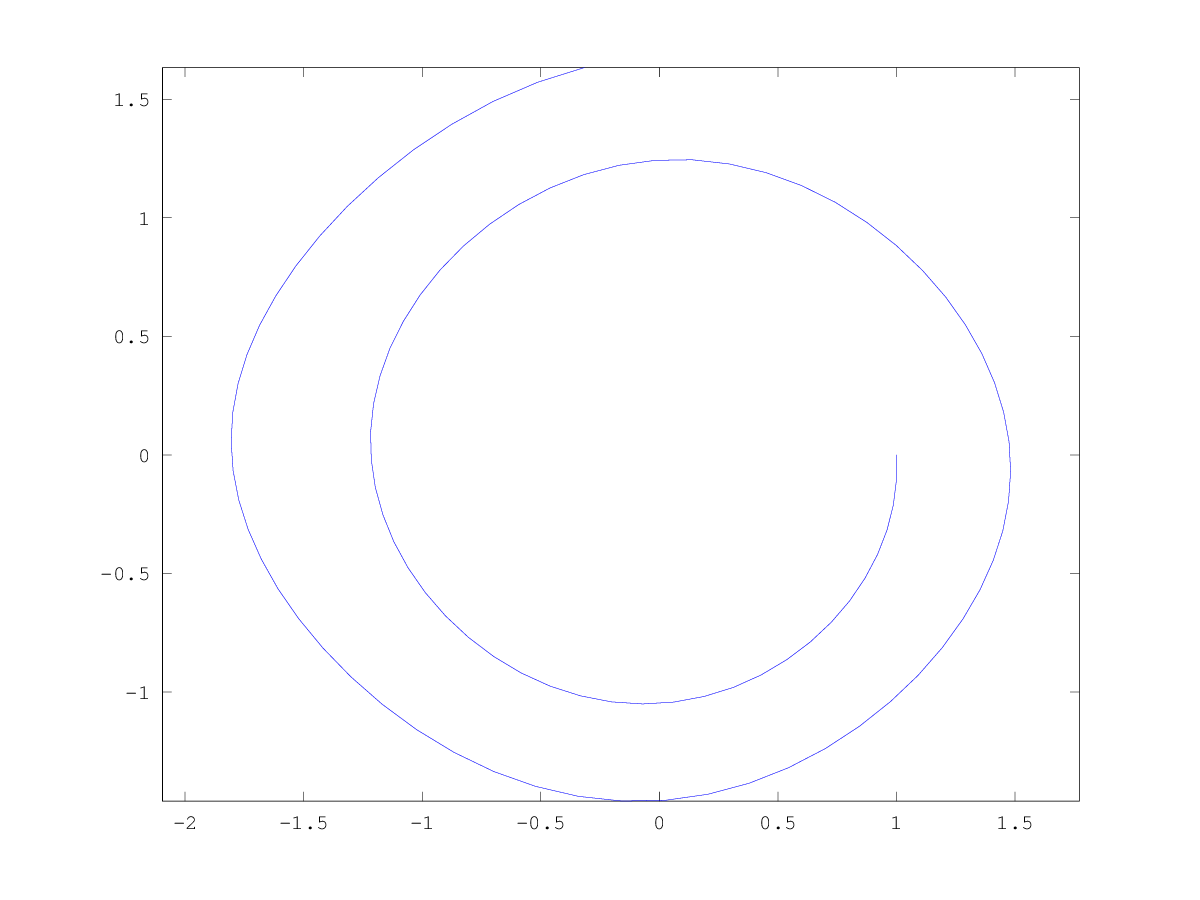

In [5]:
tf = 4*pi; N = 100; x0 = 0; y0 = [1;0]; h=tf/N; 
eta = eulerND(x0,y0,h, @pendol ,N);

plot(eta(1, :), eta(2, :)); axis('equal');


D'entrada esperaríem que el gràfic fos un cercle tancat, però 
com podem veure amb $N = 100$ hem obtingut com un focus. 

Això és degut a la dissipació (error) numèrica, i ho podem solucionar
augmentant el pas $h$, i.e. augmentant el valor de $N$.

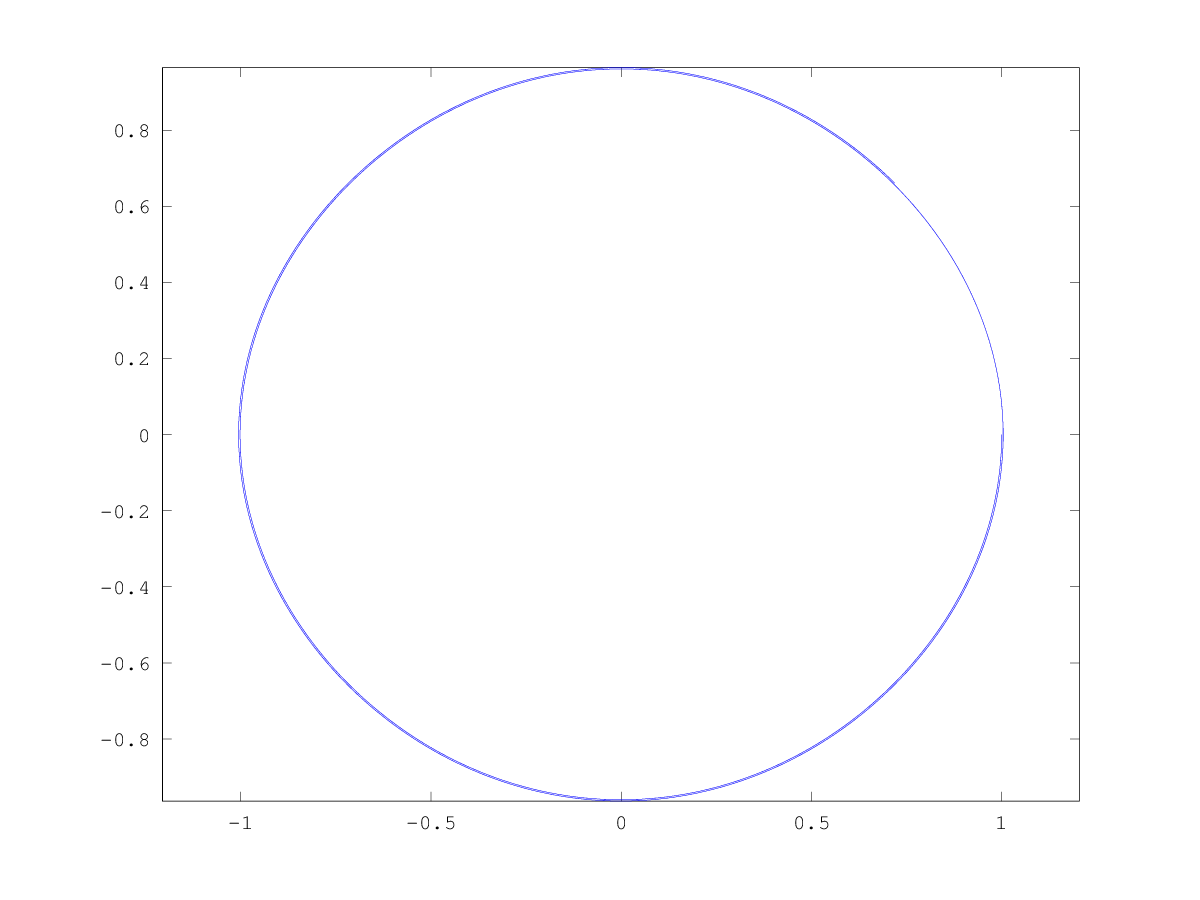

In [4]:
tf = 4*pi; N*=100; x0 = 0; y0 = [1;0]; h=tf/N; 
eta = eulerND(x0,y0,h, @pendol ,N);

plot(eta(1, :), eta(2, :)); axis('equal');